# 3. Convolutional Autoencoder
- Using Simple Convolutional Neural Network

## 1. Settings

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

## 2. Data

In [3]:
mnist_train = dset.MNIST("./data/MNIST", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [21]:
batch_size = 100
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 3. Model

In [5]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.Conv2d(1,16,3,padding=1),   # batch x 16 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(16),
                        nn.Conv2d(16,32,3,padding=1),  # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(32),
                        nn.Conv2d(32,64,3,padding=1),  # batch x 32 x 28 x 28
                        nn.ReLU(),
                        nn.BatchNorm2d(64),
                        nn.MaxPool2d(2,2)              # batch x 64 x 14 x 14
        )
        self.layer2 = nn.Sequential(
                        nn.Conv2d(64,128,3,padding=1),  # batch x 64 x 14 x 14
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.MaxPool2d(2,2),
                        nn.Conv2d(128,256,3,padding=1),  # batch x 64 x 7 x 7
                        nn.ReLU()
        )
        
                
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(batch_size, -1)
        return out
    
encoder = Encoder().cuda()

In [6]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.layer1 = nn.Sequential(
                        nn.ConvTranspose2d(256,128,3,2,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(128),
                        nn.ConvTranspose2d(128,64,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(64)
        )
        self.layer2 = nn.Sequential(
                        nn.ConvTranspose2d(64,16,3,1,1),
                        nn.ReLU(),
                        nn.BatchNorm2d(16),
                        nn.ConvTranspose2d(16,1,3,2,1,1),
                        nn.ReLU()
        )
        
    def forward(self,x):
        out = x.view(batch_size,256,7,7)
        out = self.layer1(out)
        out = self.layer2(out)
        return out

decoder = Decoder().cuda()

In [7]:
f = nn.ConvTranspose2d(1,1,3,2,2,1)
x = Variable(torch.Tensor(1,1,7,7))
f(x).size()

  #   0-0-0-0-0-0-0 
  #   1234567890123-             
  # ^^^           ^^^ 

torch.Size([1, 1, 12, 12])

## 4. Loss func & Optimizer

In [8]:
parameters = itertools.chain(encoder.parameters(), decoder.parameters())
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=0.0002)

## 5. Train 

In [22]:
try:
    encoder, decoder = torch.load('./model/conv_autoencoder.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

num_epoch = 10

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        optimizer.zero_grad()
        
        image = Variable(image).cuda()
        z = encoder(image)
        output = decoder(z)
        loss = loss_func(output,image)
        
        loss.backward()
        optimizer.step()
        
#         if j % 10 == 0:
#             torch.save([encoder,decoder],'./model/conv_autoencoder.pkl')
#             print(loss)
    print("loss is", loss.cpu().data.numpy()[0])        



--------model restored--------

loss is 0.00114275
loss is 0.00138544
loss is 0.00155522
loss is 0.00117152
loss is 0.00139717
loss is 0.00113509
loss is 0.00110072
loss is 0.00120754
loss is 0.00133552
loss is 0.00122627


## 6. Check with Train Image

torch.Size([100, 28, 28])


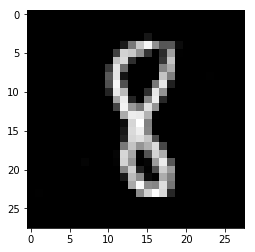

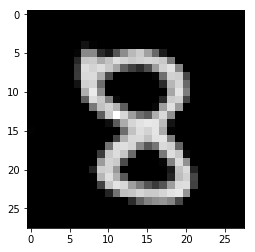

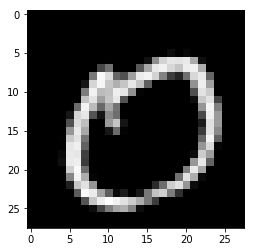

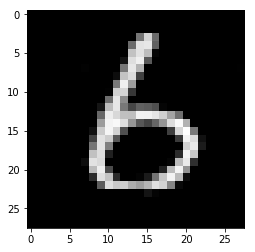

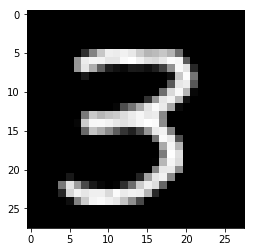

In [15]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    #plt.imshow(torch.squeeze(image[i]).numpy(),cmap='gray')
    #plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()

In [17]:
for i in range(1):
    for j,[image,label] in enumerate(test_loader):
       
        image = Variable(image,volatile=True).cuda()
        z = encoder(image)
        output = decoder(z)
        
#     if j % 10 == 0:
#         print(loss)  
    print("loss is", loss.cpu().data.numpy()[0])        

Variable containing:
1.00000e-03 *
  1.2386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2386
[torch.cuda.FloatTensor of size 1 (GPU 0)]

Variable containing:
1.00000e-03 *
  1.2386
[torch.cuda.FloatTensor of size 1 (GPU 0)]



torch.Size([100, 28, 28])


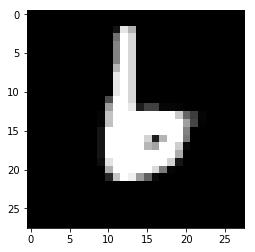

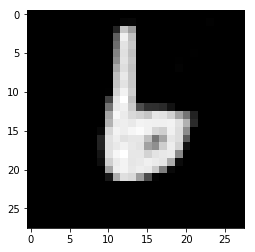

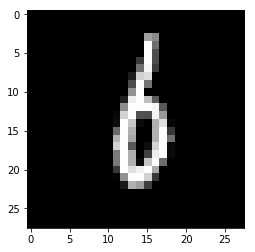

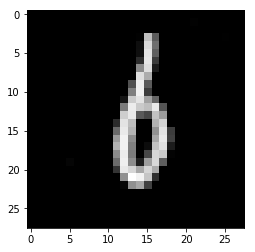

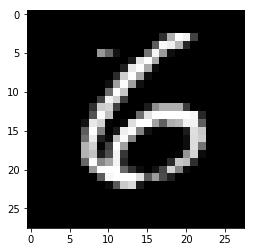

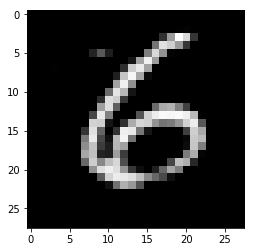

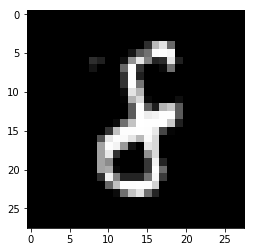

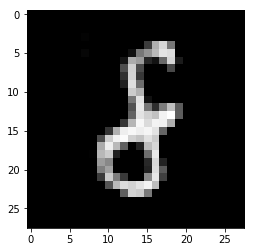

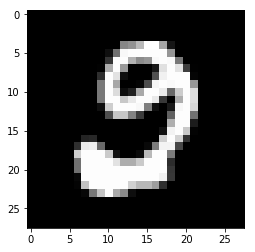

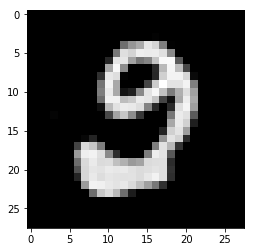

In [19]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(5):
    plt.imshow(torch.squeeze(image[i].cpu()).data.numpy(),cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(),cmap='gray')
    plt.show()